In [23]:
import numpy as np
#sigmoid function
def sigmoid(X):
   return 1/(1+np.exp(-X))

In [87]:
def mlp_n_1_training(x, d, eta, Nt, Ne, W0N_1, W01_2):
    """
    J_MSE, W_1, W1_2 = mlp_n_1_training(x, d, Nn, eta, Nt, Nb, Ne, W0)
    Saídas:
    J_MSE: valor da função custo ao longo das épocas
    W0_1: vetor de pesos da camada 1. - Cada neurônio tem um peso somente (uma entrada) 
    W1_2: vetor de pesos do neurônio 1 da camada de saída
    Entradas:
    x: sinal de entrada: (apenas uma feature)
    d: sinal desejado
    eta: passo de adaptação
    Nt: número de dados de treinamento
    Ne: número de épocas
    W0_1: vetor de pesos da camada 1. Cada neurônio tem um peso somente (uma entrada) 
    W01_2: vetor de pesos o neurônio 1 da camada de saída (útlima iteração, inclui o bias)
    """
    WN_1  = W0N_1.reshape(-1,1).copy()
    W1_2 = W01_2.reshape(-1,1).copy()

    # inicialização do vetor que contém o valor da função custo
    J_MSE = np.zeros((Ne, 1))

    # Juntamos o vetor de entrada com o sinal desejado e inserimos
    # uma coluna de uns para levar em conta o bias
    Xd = np.hstack((np.ones((Nt, 1)), x.reshape(-1,1), d.reshape(-1,1)))
    v1 = np.zeros((WN_1.shape[1],1))
    y1 = np.zeros((WN_1.shape[1],1))

    #For das épocas
    for k in range(Ne):

        np.random.shuffle(Xd)
        X = Xd[:, 0:2]
        d = Xd[:, [2]]

        #Cálculo progressivo
        #Neuronios da camada 1:
        v1 = X@WN_1
        y1 = sigmoid(v1)
        dphiN_1 = y1 *(1 - y1) #dphis da camada 1

        #Neurônio da camada de saída
        X2 = np.hstack((np.ones((Nt, 1)), y1))
        v1_2 = X2@W1_2
        y1_2 = sigmoid(v1_2)
        dphi1_2 = y1_2 * (1 - y1_2)
        print(X2.shape)
        print(W1_2.shape)
        print(y1_2.shape)

        #Erro da última camada
        e1_2 = d - y1_2

        #Algoritmo de backpropagation
        delta1_2 = dphi1_2*e1_2
        delta1 = dphi1_2*dphiN_1*W1_2 #Vetor de deltas dos neurônios da camada 1

        #Atualização dos pesos da última camada
        W1_2 = W1_2 + eta*(delta1_2*X2)

        #Atualização dos pesos da primeira camada
        WN_1 = WN_1 + eta*(delta1*X)

        J_MSE[k] = (J_MSE[k] + (np.linalg.norm(e1_2)) ** 2)

        print(f"Época: {k}, MSE: {J_MSE[k]}")
    
    return J_MSE, WN_1, W1_2

# --------- #
#Gerando conjunto de dados e de treinamentos
num_points_training = 1000
x = np.random.uniform(1,100, num_points_training)
y = 1/x
num_neurons_hidden_layer = 2
W0_1 = np.zeros(2)
W01_2 = np.zeros((num_neurons_hidden_layer, 2))

mlp_n_1_training(x, y, 0.1, len(x), 1,W0_1,W01_2)

(1000, 2)
(2, 1)
(1000, 1)


ValueError: operands could not be broadcast together with shapes (1000,1) (2,1) 

In [52]:
# Gerando conjuntos de dados e de treinamentos


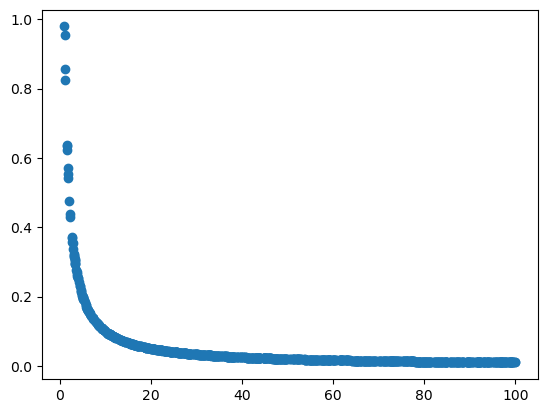

In [53]:
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')

In [63]:
np.zeros(2)


array([0., 0.])